# Perceptron Method

Let y=WX be the eqn of hyperplane
where W=[w0,w1,w2...wn] and X=[X0,x1,x2....Xn] 

## `--Algorithm--`

* Choose random values of wts initially 
* until converge:
    pick and random point and chk if it is classified properly
    if yes -> Do nothing and move to next iteration
    else -> Do transformation to classify it properly
* repeat above steps until we converges

## `--PsudoCode--`

```python
for _ in range(epochs):
    np.random.randint(X.shape[0])
    y_actual=y[idx]
    y_hat=np.dot(X[idx],W)

    if y[idx]<0 and y_hat>=0:
        # Transform/Move line towards +ve region
        Wts-=self.alpha*X[idx]
    elif y[idx]>=0 and y_hat<0:
        # Transform/Move line towards -ve region
        Wts+=self.alpha*X[idx]
```

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
from sklearn.model_selection import train_test_split
%matplotlib inline

In [176]:
df=pd.read_csv("logistic-reg-sampleDataset.csv")
df.head(5)

,Feature1,Feature2,Target
0,2.5,1.2,0
1,3.9,2.8,0
2,1.4,1.3,1
3,4.6,3.5,0
4,3.1,2.4,1


In [177]:
df["Target"]=np.where(df["Target"]==0,-1,1)
df.head(5)

,Feature1,Feature2,Target
0,2.5,1.2,-1
1,3.9,2.8,-1
2,1.4,1.3,1
3,4.6,3.5,-1
4,3.1,2.4,1


In [178]:
# Extracting features and target-varialbes from the dataset
m = df.shape[0]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape((m, 1))
X[:5], y[:5]

(array([[2.5, 1.2],
        [3.9, 2.8],
        [1.4, 1.3],
        [4.6, 3.5],
        [3.1, 2.4]]),
 array([[-1],
        [-1],
        [ 1],
        [-1],
        [ 1]]))

In [179]:
# Spliting Data for Training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((40, 2), (10, 2), (40, 1), (10, 1))

In [180]:
class Perceptron:
    def __init__(self,alpha=0.01,num_iter=1000):
        self.alpha = alpha
        self.num_iter = num_iter
        self.thetas=None

    def fit(self,X,y):
        m,n = X.shape
        # Adding col for the intercept
        X=np.concatenate([np.ones((m,1)),X],axis=1)
        self.thetas=np.random.random(n+1)
        for _ in range(self.num_iter):
            idx=np.random.randint(m)
            y_hat = np.dot(X[idx], self.thetas)

            if y[idx]<0 and y_hat>=0:
                # Transform/Move line towards +ve region
                self.thetas-=self.alpha*X[idx]
            elif y[idx]>=0 and y_hat<0:
                # Transform/Move line towards -ve region
                self.thetas +=self.alpha*X[idx]
    
    def predict(self,X):
        X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
        y_pred=np.dot(X,self.thetas)
        y_pred=np.where(y_pred>=0,1,-1)
        return y_pred

In [181]:
perceptron=Perceptron()
perceptron.fit(X,y)
perceptron.thetas

array([ 0.2938082 , -0.16170643,  0.04289284])

In [182]:
y_pred=perceptron.predict(X_test)
y_pred,y_test

(array([-1, -1, -1,  1, -1, -1, -1,  1,  1,  1]),
 array([[ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [ 1]]))

<Axes: >

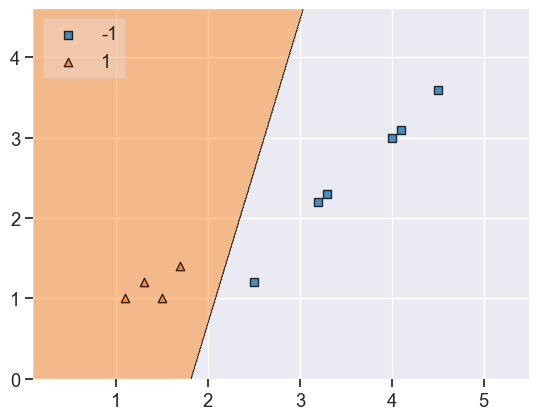

In [183]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_pred, clf=perceptron, legend=2)

The BAD thing about this Model is it doesn't behave optimally always i.e once all points are classified it will not optimise/learn in order to maximize the marginal plane thus can perform a bit loose in testing phase.

And thats why we tend to use the Sigmoid method which is much more Reliable and efficient